# Proje Özeti
Enerjinin tüketiminin planlanması gelecekte daha temiz bir dünya için kaçınılmaz bir süreç haline gelmiştir. 
Bu projenin öncelikli hedefi de Kaggle'da bulunan İspanya'nın 2015-2019 yılları arasındaki 4 yıllık
enerji talepleri datasını kullanarak, gelecekteki talebi tahmin etmek ve onu İspanya'daki Transmission Service Operator(TSO) kurumunun yaptığı tahminlerle karşılaştırmaktır.

# Data Wrangling and EDA

In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import mean_absolute_error,  r2_score
pd.set_option("display.max_colwidth", 40)


In [4]:
df = pd.read_csv('energy_dataset.csv')

df.head(5)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [5]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [7]:
corr = df.corr()
print(corr['total load actual'].sort_values(ascending=False).to_string())

total load actual                              1.000000
total load forecast                            0.995139
generation fossil gas                          0.548913
generation fossil oil                          0.497089
generation hydro water reservoir               0.479481
price day ahead                                0.473869
price actual                                   0.436127
forecast solar day ahead                       0.404362
generation fossil hard coal                    0.396564
generation solar                               0.396189
generation fossil brown coal/lignite           0.280461
generation other renewable                     0.181714
generation hydro run-of-river and poundage     0.118570
generation other                               0.100690
generation nuclear                             0.085664
generation biomass                             0.083288
generation waste                               0.077312
generation wind onshore                        0

<AxesSubplot:>

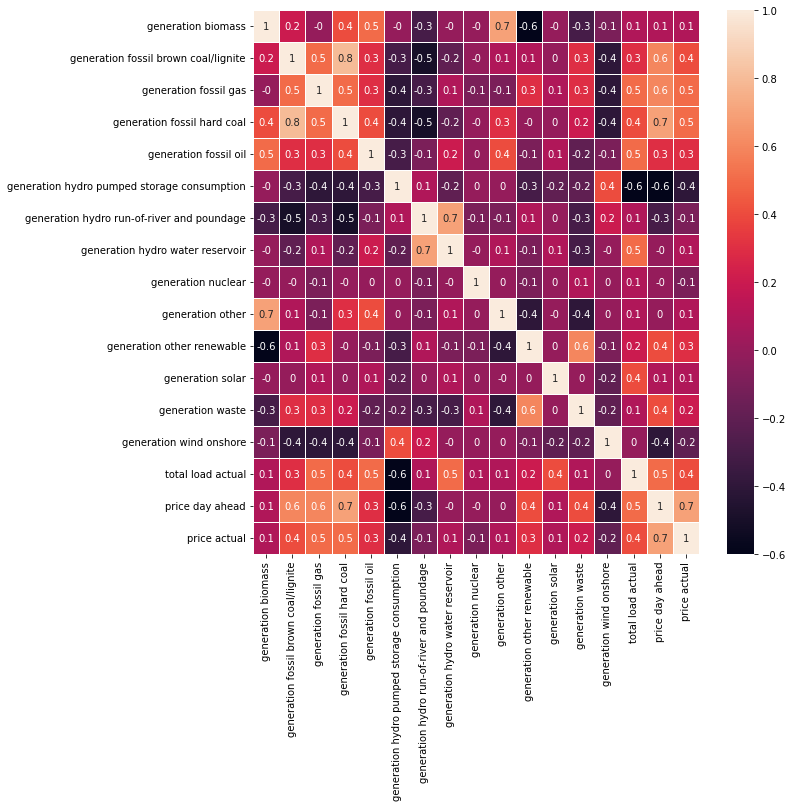

In [8]:
#extract the nan columns with 0 correlation to total load actual
nan_colms= ['generation fossil coal-derived gas',
           'generation fossil oil shale',
           'generation fossil peat',
           'generation geothermal',
           'generation hydro pumped storage aggregated',
           'generation marine',
           'generation wind offshore',
           'forecast wind offshore eday ahead',
           'forecast wind onshore day ahead',
           'forecast solar day ahead',
           'total load forecast']

new_df = df.drop(columns = nan_colms, axis = 1)

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(round(new_df.corr(),1),annot=True,linewidth=0.9,ax=ax )

In [9]:
#Nan değerleri kontrol edelim
new_df.isnull().sum()

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

In [10]:
#Kaç tane 0 değer olduğunu hesaplayalım
new_df.eq(0).sum()

time                                               0
generation biomass                                 4
generation fossil brown coal/lignite           10517
generation fossil gas                              1
generation fossil hard coal                        3
generation fossil oil                              3
generation hydro pumped storage consumption    12607
generation hydro run-of-river and poundage         3
generation hydro water reservoir                   3
generation nuclear                                 3
generation other                                   4
generation other renewable                         3
generation solar                                   3
generation waste                                   3
generation wind onshore                            3
total load actual                                  0
price day ahead                                    0
price actual                                       0
dtype: int64

In [11]:

new_df.shape

(35064, 18)

In [12]:
# NAN değerleri linear bir şekilde doldurduk, yani NaN, öncesindeki ve sonrasındaki değerlerin toplamının yarısı 
# olarak değiştirildi. Model accuracy'si denenirken, farklı doldurma yöntemleri de denenebilir.
new_df = new_df.interpolate(method ='linear', limit_direction ='forward')

new_df.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

In [13]:
copy_df = new_df
new_df.eq(0).sum()

time                                               0
generation biomass                                 4
generation fossil brown coal/lignite           10524
generation fossil gas                              1
generation fossil hard coal                        3
generation fossil oil                              3
generation hydro pumped storage consumption    12614
generation hydro run-of-river and poundage         3
generation hydro water reservoir                   3
generation nuclear                                 3
generation other                                   4
generation other renewable                         3
generation solar                                   3
generation waste                                   3
generation wind onshore                            3
total load actual                                  0
price day ahead                                    0
price actual                                       0
dtype: int64

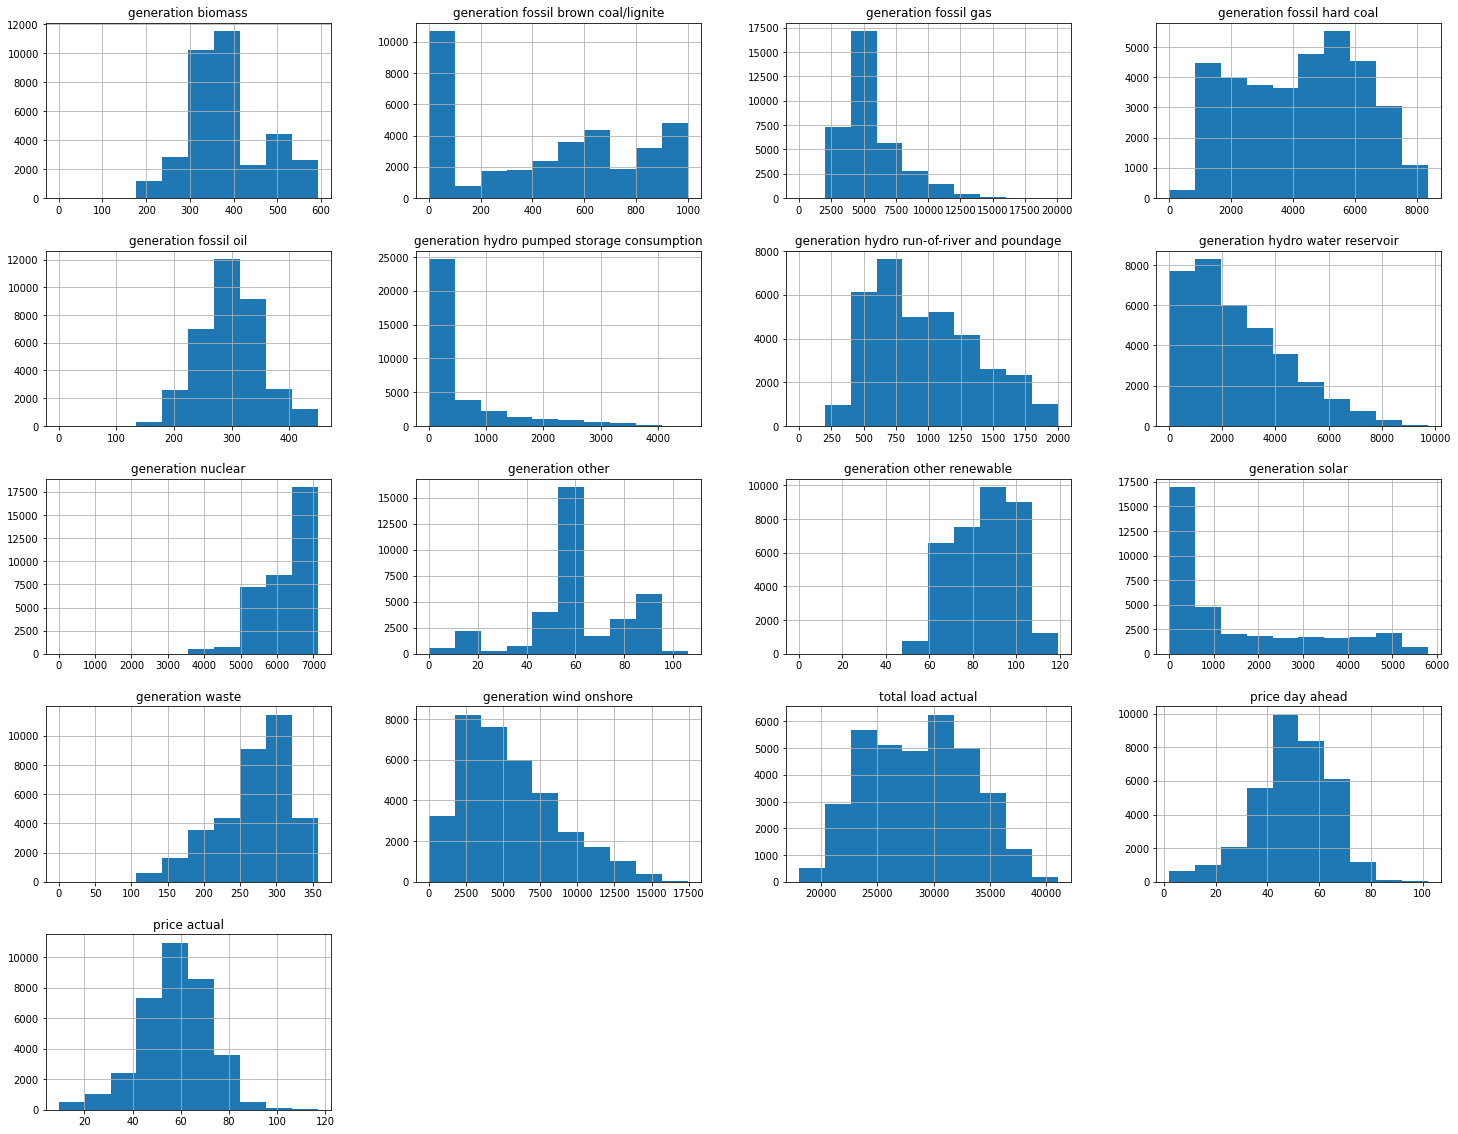

In [14]:
# Histogram
new_df.hist(figsize = (25,20))
plt.show()
#Farklı enerji kaynaklarının ortalama enerji üretimlerini veya ne sıklıkla ne kadar enerji ürettiklerini anlamak için.
# x-axis: tekrarlanma miktarı y-axis: üretilen enerji (MWh)

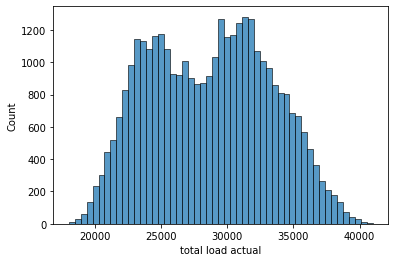

In [15]:
sns.histplot(df,x='total load actual');

In [16]:
#df["time"]
#datetime_series = pd.to_datetime(new_df["time"], utc = True)
#datetime_series.dt.hour
#new_df['hour'] = datetime_series.dt.hour
#new_df['hour']

new_df.columns = new_df.columns.str.replace(' ','_').str.replace('-','_')

In [17]:
#Tarih sütünunu gelecekteki kullanımlar için saat, gün, hafta, ay gibi dilimlere böldüm:
# Haftalık koy!
df_datesiz = new_df.select_dtypes(include = ["float64", "int64"])
datetime_series = pd.to_datetime(new_df['time'],utc=True)
new_df['date'] = datetime_series.dt.date
new_df['year'] = datetime_series.dt.year
new_df['hour'] = datetime_series.dt.hour
new_df['day'] = datetime_series.dt.day
new_df['month'] = datetime_series.dt.month
new_df['season'] = datetime_series.dt.quarter
new_df['day_of_week'] = datetime_series.dt.dayofweek

date = new_df[["date","year","month","day","hour","season","day_of_week"]]

date


,date,year,month,day,hour,season,day_of_week
0,2014-12-31,2014,12,31,23,4,2
1,2015-01-01,2015,1,1,0,1,3
2,2015-01-01,2015,1,1,1,1,3
3,2015-01-01,2015,1,1,2,1,3
4,2015-01-01,2015,1,1,3,1,3
...,...,...,...,...,...,...,...
35059,2018-12-31,2018,12,31,18,4,0
35060,2018-12-31,2018,12,31,19,4,0
35061,2018-12-31,2018,12,31,20,4,0
35062,2018-12-31,2018,12,31,21,4,0


In [18]:
son_df = pd.concat([date, df_datesiz], axis=1).copy()
son_df = son_df.iloc[1:]
son_df['series']= np.arange(1,len(son_df)+1)
son_df

,date,year,month,day,hour,season,day_of_week,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,...,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,total_load_actual,price_day_ahead,price_actual,series
1,2015-01-01,2015,1,1,0,1,3,449.0,328.0,5196.0,...,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,48.10,64.92,1
2,2015-01-01,2015,1,1,1,1,3,448.0,323.0,4857.0,...,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,47.33,64.48,2
3,2015-01-01,2015,1,1,2,1,3,438.0,254.0,4314.0,...,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,42.27,59.32,3
4,2015-01-01,2015,1,1,3,1,3,428.0,187.0,4130.0,...,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,38.41,56.04,4
5,2015-01-01,2015,1,1,4,1,3,410.0,178.0,4038.0,...,7098.0,43.0,74.0,34.0,188.0,4618.0,19905.0,35.72,53.63,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31,2018,12,31,18,4,0,297.0,0.0,7634.0,...,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,68.85,77.02,35059
35060,2018-12-31,2018,12,31,19,4,0,296.0,0.0,7241.0,...,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,68.40,76.16,35060
35061,2018-12-31,2018,12,31,20,4,0,292.0,0.0,7025.0,...,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,66.88,74.30,35061
35062,2018-12-31,2018,12,31,21,4,0,293.0,0.0,6562.0,...,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0,63.93,69.89,35062


As we can see from above table, there is one outlier data from the 2014 year which in fact must not be in the data. Hence, I removed this data from the dataset as an outlier data.


In [19]:
out = son_df.groupby(['date','year','month','day','season','day_of_week'])['total_load_actual'].sum().reset_index()
out

,date,year,month,day,season,day_of_week,total_load_actual
0,2015-01-01,2015,1,1,1,3,575207.0
1,2015-01-02,2015,1,2,1,4,652525.0
2,2015-01-03,2015,1,3,1,5,602346.0
3,2015-01-04,2015,1,4,1,6,650518.0
4,2015-01-05,2015,1,5,1,0,543663.0
...,...,...,...,...,...,...,...
1456,2018-12-27,2018,12,27,4,3,685241.0
1457,2018-12-28,2018,12,28,4,4,687868.0
1458,2018-12-29,2018,12,29,4,5,638495.0
1459,2018-12-30,2018,12,30,4,6,605724.0


In [20]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

<AxesSubplot:xlabel='year,month', ylabel='Total load actual'>

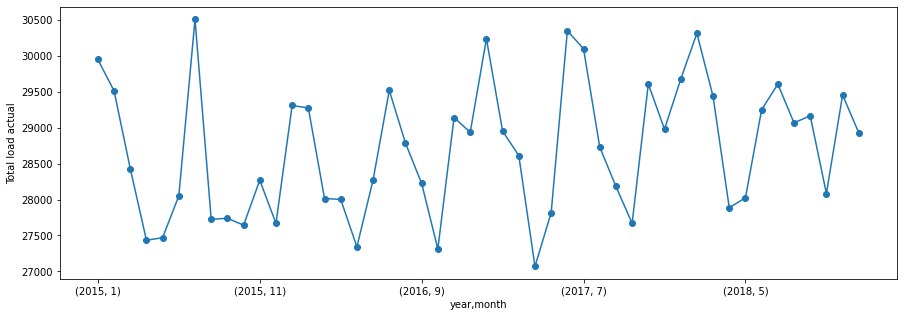

In [21]:
# Figure showing Price per total load
#fig = px.scatter(son_df,x=,
 #                y="total_load_actual",
  #               facet_col='season',
   #              opacity=0.1,
    #             title='Price Per KW Hour Compaired To Total Energy Genereated Per Season',
     #            animation_frame=son_df.year)
#fig

son_df[son_df.total_load_actual != 0].groupby([son_df.year,
                         son_df.month])["total_load_actual"].mean().plot(ylabel= 'Total load actual',figsize=(15,5),style = 'o-')



Görüldüğü gibi Sezonsallık olsa da yıllara göre sezona göre değişkenlik gözüküyor, ama genelleme yapılacak olursa yaz ve kış aylarında elektrik tüketimi artıyor diyebiliriz.

In [22]:
py_train, py_test = out[out.year < 2018], out[out.year == 2018]
print(py_train.shape)
print(py_test.shape)

(1096, 7)
(365, 7)


In [23]:
#cols = ["date","series", "year","month","day","hour","season","total_load_actual"]
#py_train = py_train[cols].reset_index(inplace = False, drop = True)
#py_test = py_test[cols].reset_index(inplace = False, drop = True)
py_train

,date,year,month,day,season,day_of_week,total_load_actual
0,2015-01-01,2015,1,1,1,3,575207.0
1,2015-01-02,2015,1,2,1,4,652525.0
2,2015-01-03,2015,1,3,1,5,602346.0
3,2015-01-04,2015,1,4,1,6,650518.0
4,2015-01-05,2015,1,5,1,0,543663.0
...,...,...,...,...,...,...,...
1091,2017-12-27,2017,12,27,4,2,705233.0
1092,2017-12-28,2017,12,28,4,3,697256.0
1093,2017-12-29,2017,12,29,4,4,675863.0
1094,2017-12-30,2017,12,30,4,5,615550.0


MONTHLY DATA IF NEEDED

In [24]:
a=py_train
#cols=["year","month"]

#a['date'] = a[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
a = a[['date','total_load_actual']]
a['date'] = pd.to_datetime(a['date'])
a["date"]= a['date'].dt.to_period('M')
a.rename(columns = {'date':'month', 'total_load_actual':'monthly_load'}, inplace = True)
monthly_data_train= a.groupby(a.month).sum().reset_index()

#monthly_data = a.groupby([a.date.dt.year,a.date.dt.month]).sum()
monthly_data_train

b = py_test

b = b[['date','total_load_actual']]
b['date'] = pd.to_datetime(b['date'])
b["date"]= b['date'].dt.to_period('M')
b.rename(columns = {'date':'month', 'total_load_actual':'monthly_load'}, inplace = True)
monthly_data_test= b.groupby(b.month).sum().reset_index()

monthly_data_test

c:\users\monster\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\monster\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\monster\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

,month,monthly_load
0,2018-01,22077336.0
1,2018-02,20369942.0
2,2018-03,21899244.0
3,2018-04,20077850.0
4,2018-05,20850559.0
5,2018-06,21060452.0
6,2018-07,22026857.5
7,2018-08,21626073.0
8,2018-09,20999662.0
9,2018-10,20894072.0


In [25]:
monthly_data_train["month"] = monthly_data_train['month'].dt.to_timestamp()
monthly_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   month         36 non-null     datetime64[ns]
 1   monthly_load  36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


# Prophet Trials

In [84]:
prophet_train = py_train[['date','total_load_actual']]
prophet_train['date']= pd.to_datetime(prophet_train['date'])
prophet_train.columns = ['ds','y']
prophet_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1096 non-null   datetime64[ns]
 1   y       1096 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.7 KB


c:\users\monster\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
prophet_train

,ds,y
0,2015-01-01,575207.0
1,2015-01-02,652525.0
2,2015-01-03,602346.0
3,2015-01-04,650518.0
4,2015-01-05,543663.0
...,...,...
1091,2017-12-27,705233.0
1092,2017-12-28,697256.0
1093,2017-12-29,675863.0
1094,2017-12-30,615550.0


In [141]:
dir(prophet.Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [359]:
import prophet
from prophet import Prophet
from matplotlib import pyplot
from prophet.diagnostics import performance_metrics, cross_validation


m = Prophet(#mcmc_samples = 300,
            changepoint_prior_scale = 0.01,
            seasonality_prior_scale = 0.01,
            holidays_prior_scale = 10.0,
            uncertainty_samples=True,
            daily_seasonality=False,
            weekly_seasonality=True,
            yearly_seasonality=True)
m.add_country_holidays(country_name = 'ES')
# fit the model
m.fit(prophet_train, 
      #show_progress = True
     )

17:11:47 - cmdstanpy - INFO - CmdStan installation c:\users\monster\appdata\local\programs\python\python37\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
17:11:47 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
17:11:47 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

17:11:56 - cmdstanpy - INFO - CmdStan done processing.
17:11:56 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, co

In [276]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).add_country_holidays(country_name = 'ES').fit(prophet_train)  # Fit model with given params
    df_cv = cross_validation(m, initial = '365.25 days', period = '90 days', horizon='365 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

17:04:23 - cmdstanpy - INFO - Chain [1] start processing
17:04:23 - cmdstanpy - INFO - Chain [1] done processing


KeyboardInterrupt: 

In [286]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

ValueError: attempt to get argmin of an empty sequence

In [360]:
# define the period for which we want a prediction
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1456,2018-12-27
1457,2018-12-28
1458,2018-12-29
1459,2018-12-30
1460,2018-12-31


In [361]:
# use the model to make a forecast
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1456,2018-12-27,703669.149696,633532.082159,774658.285262
1457,2018-12-28,701563.192156,636538.831233,775763.129280
1458,2018-12-29,654071.201274,588413.017457,725327.729678
1459,2018-12-30,630813.980701,569875.805915,705913.521609
1460,2018-12-31,691496.245150,620567.517253,761657.104675


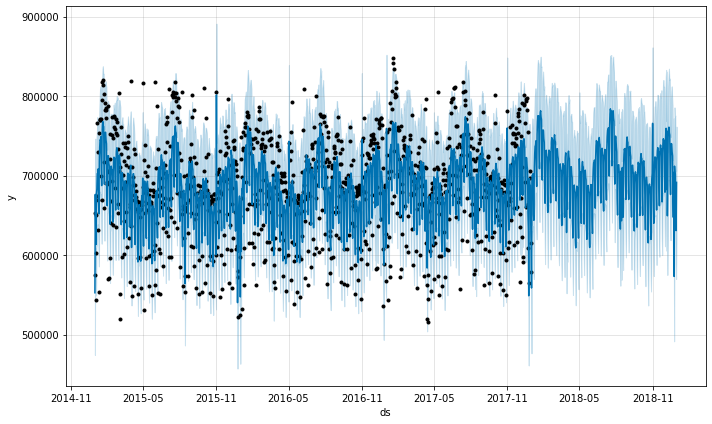

In [362]:
fig1 = m.plot(forecast)

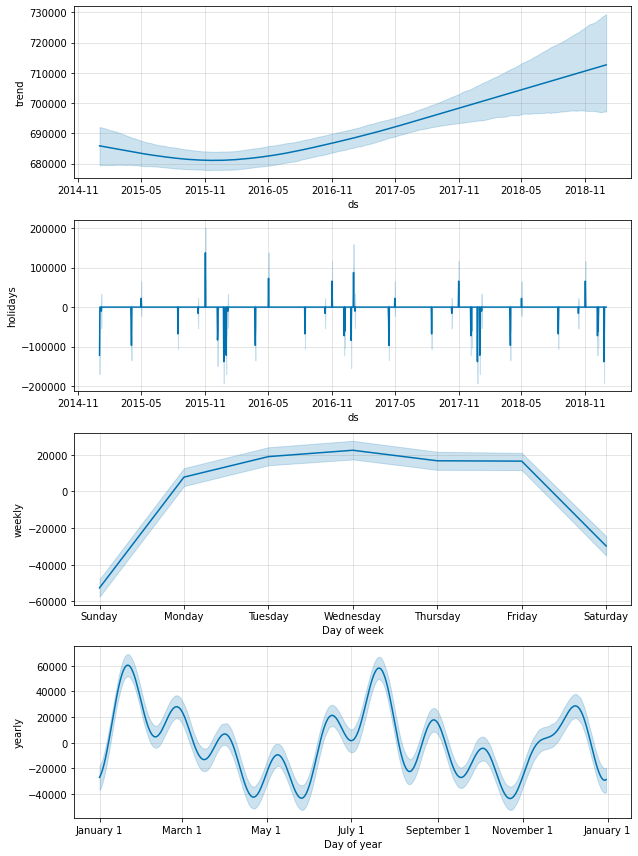

In [363]:
fig2 = m.plot_components(forecast)


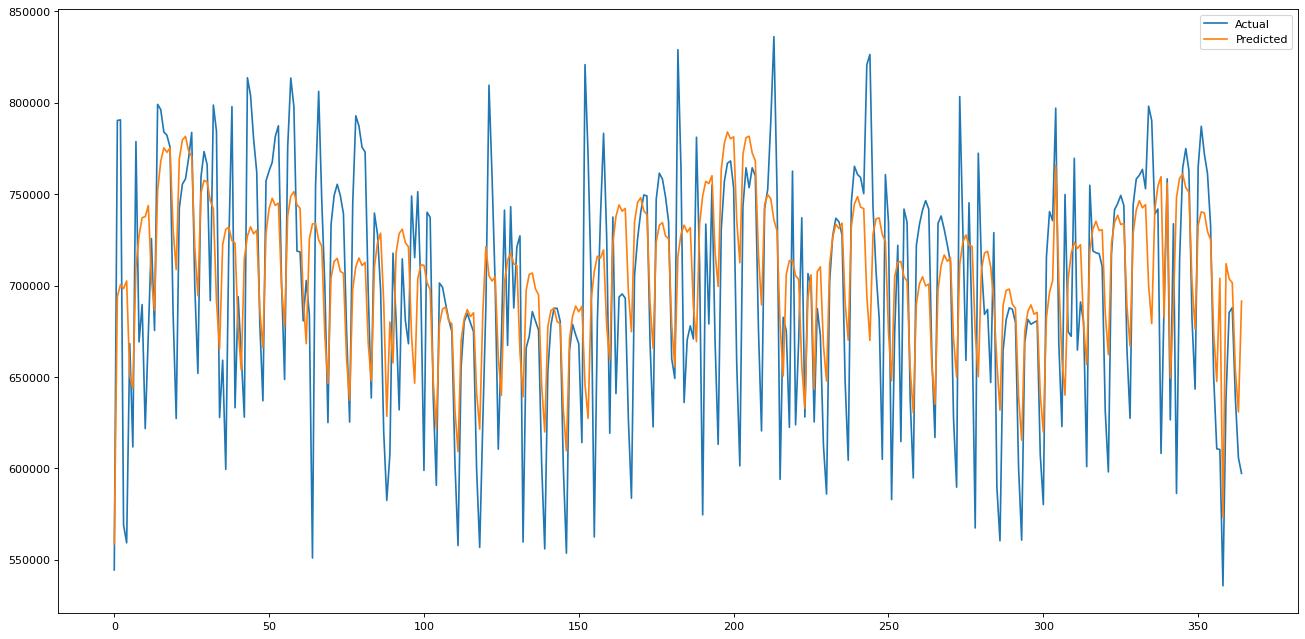

In [364]:
pyplot.figure(figsize=(20,10),dpi=80)
y_true = py_test['total_load_actual'].values
y_pred = forecast['yhat'][-365:].values
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')

pyplot.legend()
pyplot.show()


In [365]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [366]:
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
mape = MAPE(y_true, y_pred)
print('MAPE: %.3F'% mape, '%')

MAE: 40102.788
MAPE: 5.923 %


# Pycaret

In [120]:
from pycaret.regression import *

s = setup(data = py_train, test_data = py_test, target = 'total_load_actual',
          fold_strategy = 'timeseries', 
          numeric_features = ['year','month','day','season','day_of_week'],
          #categorical_features = [],
          transform_target = True,
          fold = 10, session_id = 123, 
          use_gpu = True
         )


ModuleNotFoundError: No module named 'pycaret'

In [155]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,40938.6349,2841944709.6922,52240.4997,0.3121,0.0773,0.0610,0.2530
catboost,CatBoost Regressor,41490.3272,2914495446.6007,52784.7043,0.2953,0.0782,0.0619,0.6090
lightgbm,Light Gradient Boosting Machine,41702.4651,2949105968.1979,53085.8733,0.2803,0.0783,0.0621,0.5110
gbr,Gradient Boosting Regressor,41817.3073,2932745083.9371,52734.7929,0.2815,0.0778,0.0622,0.0550
et,Extra Trees Regressor,41958.2727,3132277906.6833,55302.4239,0.2463,0.0821,0.0624,0.2520
knn,K Neighbors Regressor,44170.8777,3203239164.9173,55454.8860,0.2146,0.0822,0.0662,0.0240
ada,AdaBoost Regressor,44817.6463,3016214024.6122,54471.9184,0.2675,0.0809,0.0667,0.0520
br,Bayesian Ridge,45169.9402,3409804901.3249,57820.8656,0.1801,0.0861,0.0673,0.0100
ridge,Ridge Regression,45362.9602,3489161574.4000,58465.8809,0.1602,0.0870,0.0674,0.0070
lr,Linear Regression,45483.5926,3512091200.0000,58644.8738,0.1546,0.0872,0.0676,0.0080


In [156]:
print(best)

PowerTransformedTargetRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                power...
                                regressor=RandomForestRegressor(bootstrap=True,
                                                                ccp_alpha=0.0,
                                                                criterion='mse',
                                                                max_depth=None,
                      

In [157]:
# best model selected
final_best = finalize_model(best)

# best models prediction
prediction_holdout = predict_model(final_best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,38915.0854,2604045832.7071,51029.8524,0.3903,0.0737,0.0559


In [158]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,38915.0854,2604045832.7071,51029.8524,0.3903,0.0737,0.0559


,year,month,day,season,day_of_week,date_month_1,date_month_10,date_month_11,date_month_12,date_month_2,...,date_weekday_1,date_weekday_2,date_weekday_3,date_weekday_4,date_weekday_5,date_weekday_6,date_is_month_end_1,date_is_month_start_1,total_load_actual,Label
0,2018.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,544393.0,640333.911887
1,2018.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,790289.0,709950.095304
2,2018.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,790635.0,714225.837250
3,2018.0,1.0,4.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,568997.0,603465.126721
4,2018.0,1.0,5.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,559237.0,598651.514402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018.0,12.0,27.0,4.0,3.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,685241.0,697670.452436
361,2018.0,12.0,28.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,687868.0,685656.176777
362,2018.0,12.0,29.0,4.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,638495.0,632208.199258
363,2018.0,12.0,30.0,4.0,6.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,605724.0,594760.052183


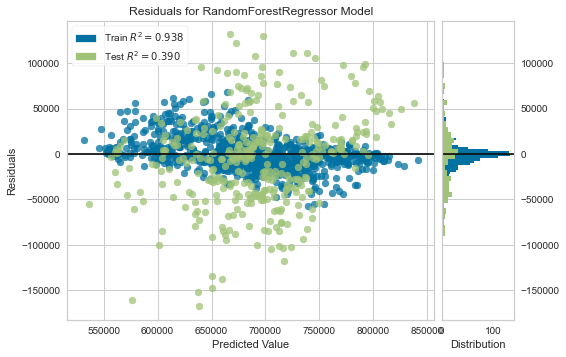

In [159]:
plot_model(best, plot = 'residuals')

In [160]:
#we create a model using light gbm
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,51829.9578,4008789880.5561,63315.0052,0.2028,0.0931,0.0771
1,70168.2364,6279161452.8253,79241.1601,-0.6681,0.1143,0.1073
2,46191.2449,3341996787.9155,57810.0059,0.2720,0.0881,0.0699
3,33820.7507,2301898198.3945,47978.1012,0.3689,0.0722,0.0508
4,30991.7292,1937049387.7625,44011.9232,0.4740,0.0643,0.0459
5,28081.0413,1356106230.9483,36825.3477,0.5558,0.0545,0.0416
6,44466.4823,2922330325.6262,54058.5823,0.4170,0.0790,0.0643
7,42067.0839,3191912467.6405,56497.0129,0.2212,0.0842,0.0627
8,36022.0995,2107634274.5786,45908.9781,0.4237,0.0672,0.0520


In [161]:
tuned_lightgbm = tune_model(lightgbm) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,57370.8877,4754671950.3392,68954.1293,0.0545,0.1031,0.0873
1,52871.3569,3706723051.4889,60882.8634,0.0153,0.0918,0.0816
2,43184.6390,3032206119.4316,55065.4712,0.3395,0.0851,0.0666
3,39889.6082,2563051601.7754,50626.5899,0.2973,0.0768,0.0606
4,37319.8182,2205501247.9471,46962.7645,0.4011,0.0704,0.0561
5,34143.6428,1847720779.9219,42985.1228,0.3948,0.0650,0.0514
6,48557.4789,3654310407.9019,60450.8925,0.2710,0.0880,0.0702
7,41435.1852,3138637841.1968,56023.5472,0.2342,0.0861,0.0644
8,40029.0401,2595923904.6040,50950.2101,0.2902,0.0732,0.0570


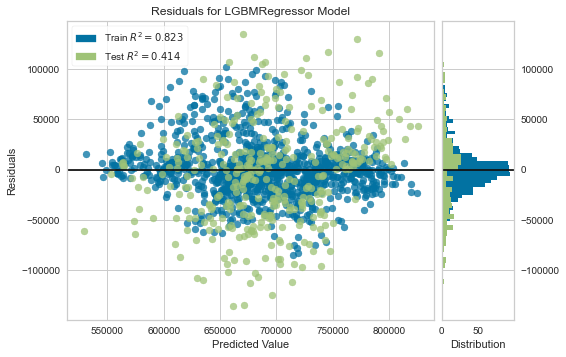

In [162]:
plot_model(lightgbm)

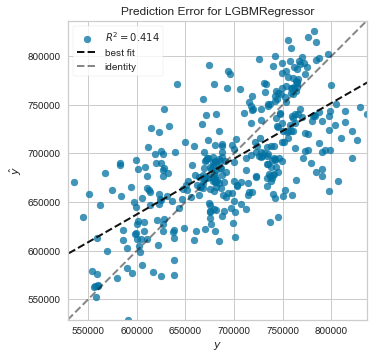

In [163]:
plot_model(lightgbm, plot = 'error')

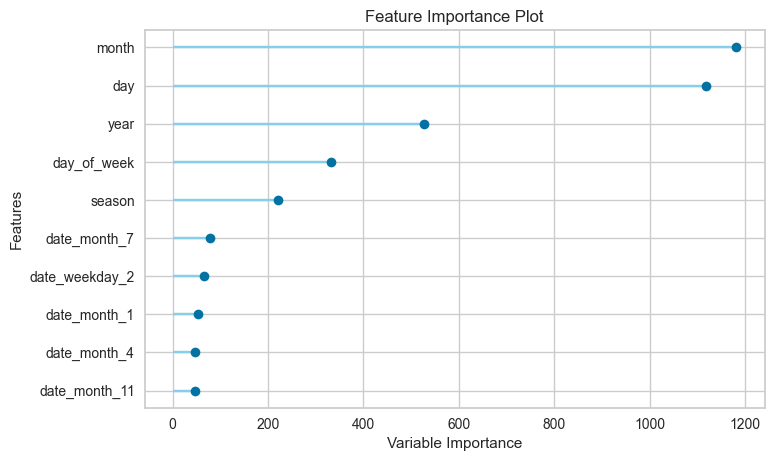

In [164]:
plot_model(tuned_lightgbm, plot='feature') 

In [165]:
final_lightgbm = finalize_model(tuned_lightgbm)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 

In [166]:
#Final Light Gradient Boosting Machine parameters for deployment
print(final_lightgbm)

PowerTransformedTargetRegressor(bagging_fraction=1.0, bagging_freq=7,
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, device='gpu',
                                feature_fraction=0.7, importance_type='split',
                                learning_rate=0.01, max_depth=-1,
                                min_child_samples=11, min_child_weight=0.001,
                                min_split_gain=0.2, n_estimators=80, n_jobs=-1,
                                num_leaves=60, objective=None,
                                power_transfor...
                                                        importance_type='split',
                                                        learning_rate=0.01,
                                                        max_depth=-1,
                                                        min_child_samples=11,
                                                        min_child_we

In [167]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,42380.6900,2740281305.2033,52347.6963,0.3584,0.0764,0.0616


In [168]:
#removing any negative values
unseen_predictions = predict_model(final_lightgbm, data=py_test)
unseen_predictions.head()
unseen_predictions.loc[unseen_predictions['Label'] < 0, 'Label'] = 0 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,42380.6900,2740281305.2033,52347.6963,0.3584,0.0764,0.0616


In [169]:
unseen_predictions.head(20)

,date,year,month,day,season,day_of_week,total_load_actual,Label
1096,2018-01-01,2018,1,1,1,0,544393.0,682188.193224
1097,2018-01-02,2018,1,2,1,1,790289.0,717217.796156
1098,2018-01-03,2018,1,3,1,2,790635.0,700582.731294
1099,2018-01-04,2018,1,4,1,3,568997.0,660224.161203
1100,2018-01-05,2018,1,5,1,4,559237.0,660178.552553
1101,2018-01-06,2018,1,6,1,5,668203.0,677057.838469
1102,2018-01-07,2018,1,7,1,6,611720.0,683138.796857
1103,2018-01-08,2018,1,8,1,0,778702.0,706665.137616
1104,2018-01-09,2018,1,9,1,1,669157.0,705312.731812
1105,2018-01-10,2018,1,10,1,2,689579.0,680271.447893


In [170]:
def plot_series(time, series,i, format="-", start=0, end=None):
    #plt.figure(figsize=(20,10))
    plt.plot(time[start:end], series[start:end], format,label=i)
    plt.xlabel("date")
    plt.ylabel("Total_load_actual")
    plt.legend()

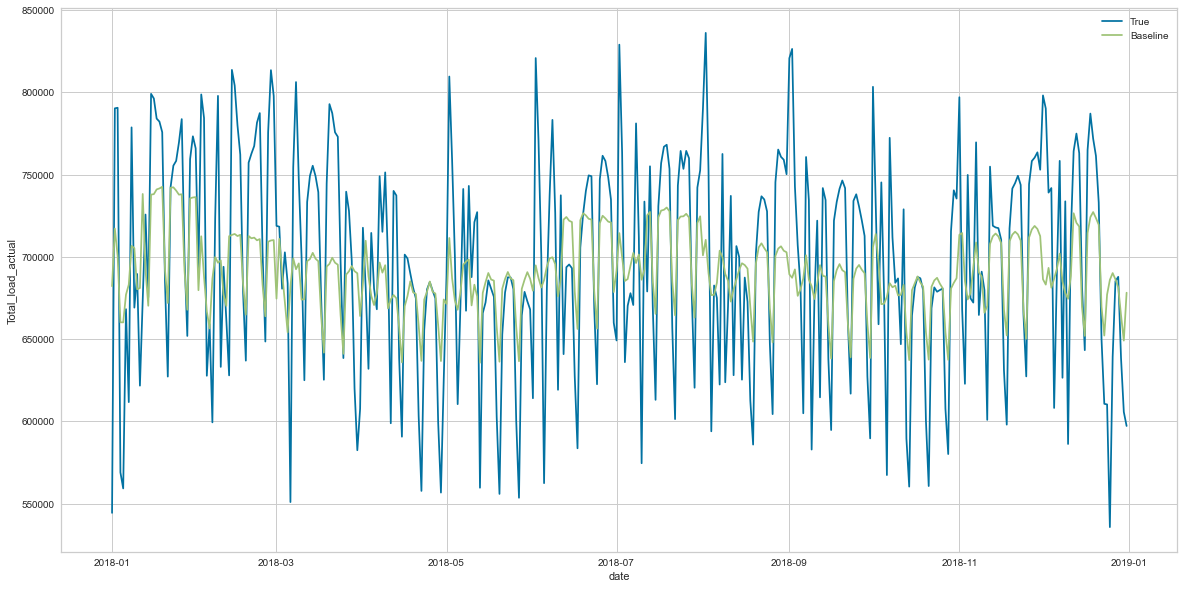

In [171]:
plt.figure(figsize=(20,10))
plot_series(py_test.date, py_test['total_load_actual'],"True")
#plot_series(train['ds'],train['y'])
plot_series(py_test.date, unseen_predictions['Label'],"Baseline")

In [172]:
def calc_smape(y_hat, y):
        return 100/len(y) * np.sum(2 * np.abs(y_hat - y) / (np.abs(y) + np.abs(y_hat)))
calc_smape(py_test['total_load_actual'].values,unseen_predictions['Label'].values)

6.135651243680138

In [173]:
#huber = create_model('huber', verbose = False)
rf = create_model('rf', verbose = False)

#xgboost = create_model('xgboost')


In [174]:
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,55119.3022,4465805915.4683,66826.6857,0.1119,0.0995,0.0833
1,54033.3634,3874338423.2845,62244.1839,-0.0293,0.0934,0.0834
2,41412.0041,3169197360.0261,56295.6247,0.3096,0.0872,0.0645
3,35556.6103,2288709750.2141,47840.4614,0.3726,0.0722,0.0538
4,34904.2463,2150690846.4084,46375.5415,0.4160,0.0688,0.0521
5,30196.3094,1497981663.3523,38703.7681,0.5093,0.0575,0.0447
6,46042.4836,3300299819.9834,57448.2360,0.3416,0.0844,0.0670
7,39278.9478,2874299741.1276,53612.4961,0.2987,0.0816,0.0604
8,37956.1521,2413504533.9607,49127.4316,0.3400,0.0715,0.0545


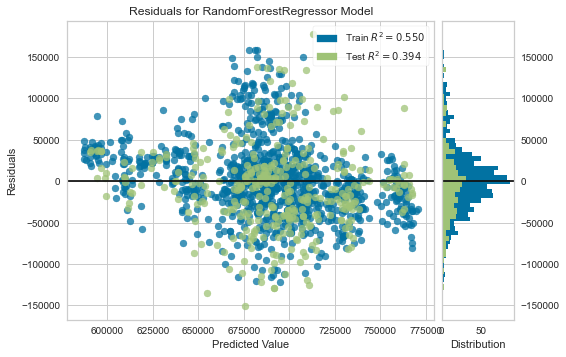

In [175]:
plot_model(tuned_rf)

In [181]:
unseen_predictions_rf = predict_model(tuned_rf, data=py_test)
unseen_predictions_rf.head()
unseen_predictions_rf.loc[unseen_predictions_rf['Label'] < 0, 'Label'] = 0 
unseen_predictions_rf.head(20)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,37988.4496,2589286400.2946,50885.0312,0.3937,0.0739,0.0550


,date,year,month,day,season,day_of_week,total_load_actual,Label
1096,2018-01-01,2018,1,1,1,0,544393.0,682026.628421
1097,2018-01-02,2018,1,2,1,1,790289.0,691639.851834
1098,2018-01-03,2018,1,3,1,2,790635.0,695510.496788
1099,2018-01-04,2018,1,4,1,3,568997.0,689354.575977
1100,2018-01-05,2018,1,5,1,4,559237.0,694495.617866
1101,2018-01-06,2018,1,6,1,5,668203.0,679092.528989
1102,2018-01-07,2018,1,7,1,6,611720.0,667285.537297
1103,2018-01-08,2018,1,8,1,0,778702.0,690989.774868
1104,2018-01-09,2018,1,9,1,1,669157.0,691348.789904
1105,2018-01-10,2018,1,10,1,2,689579.0,691470.874983


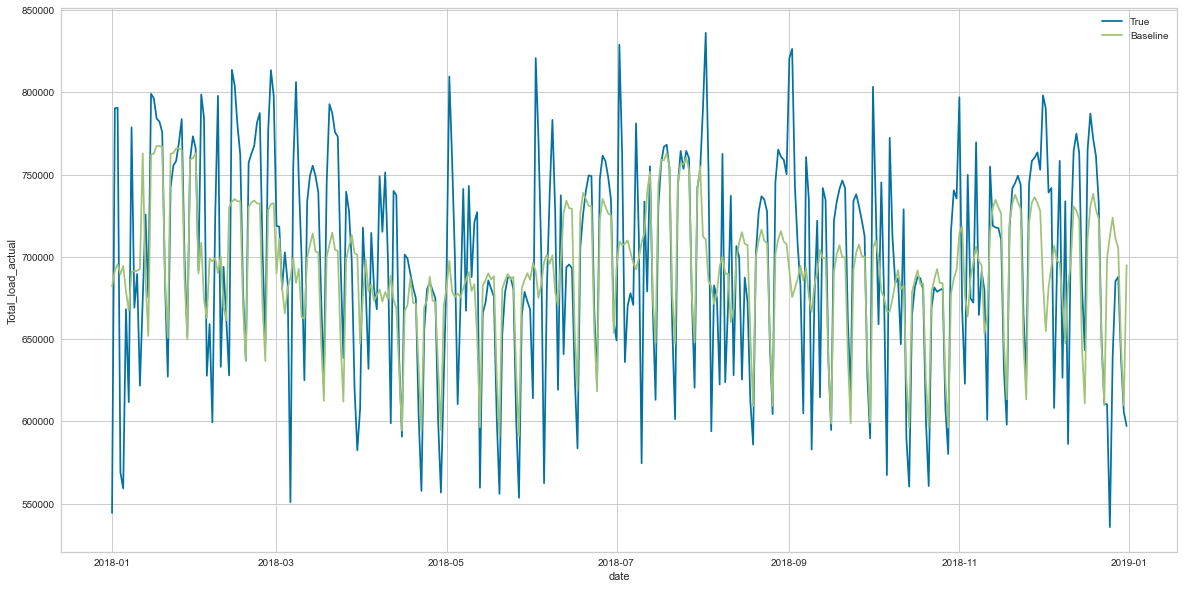

In [182]:
plt.figure(figsize=(20,10))
plot_series(py_test.date, py_test['total_load_actual'],"True")
#plot_series(train['ds'],train['y'])
plot_series(py_test.date, unseen_predictions_rf['Label'],"Baseline")

In [183]:
xgboost = create_model('xgboost')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,63650.4688,6312574976.0000,79451.7109,-0.2553,0.1194,0.0958
1,84399.0234,9385730048.0000,96879.9766,-1.4934,0.1368,0.1283
2,47038.4297,3407236096.0000,58371.5352,0.2578,0.0891,0.0713
3,37002.1641,2505555200.0000,50055.5195,0.3131,0.0752,0.0554
4,37737.1992,2290952960.0000,47863.8984,0.3779,0.0698,0.0555
5,24324.0605,1247527936.0000,35320.3633,0.5914,0.0526,0.0365
6,48987.2266,3968418304.0000,62995.3828,0.2084,0.0927,0.0713
7,47030.6602,3860340224.0000,62131.6367,0.0581,0.0940,0.0702
8,39731.9805,2342930432.0000,48403.8281,0.3593,0.0701,0.0579


In [184]:
tuned_xg = tune_model(xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,55274.5742,4483984384.0000,66962.5625,0.1083,0.0998,0.0829
1,73503.2344,7178075136.0000,84723.5234,-0.9069,0.1201,0.1115
2,43855.2266,2945874688.0000,54275.9141,0.3583,0.0832,0.0664
3,33426.4023,2257092608.0000,47508.8672,0.3812,0.0714,0.0502
4,33593.8555,2094166016.0000,45762.0586,0.4313,0.0667,0.0495
5,27925.1348,1421538688.0000,37703.2969,0.5344,0.0558,0.0413
6,43561.1602,2975450368.0000,54547.6875,0.4064,0.0802,0.0633
7,40248.0000,2935153152.0000,54177.0547,0.2838,0.0814,0.0611
8,32277.5156,1779837056.0000,42188.1133,0.5133,0.0616,0.0470


In [190]:
xg_predictions = predict_model(xgboost, data= py_test, round=0)
xg_predictions.loc[xg_predictions['Label'] < 0, 'Label'] = 0
xg_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,42556,3115851224,55820,0,0,0


,date,year,month,day,season,day_of_week,total_load_actual,Label
1096,2018-01-01,2018,1,1,1,0,544393.0,648186.3125
1097,2018-01-02,2018,1,2,1,1,790289.0,704669.9375
1098,2018-01-03,2018,1,3,1,2,790635.0,716353.6250
1099,2018-01-04,2018,1,4,1,3,568997.0,607034.8750
1100,2018-01-05,2018,1,5,1,4,559237.0,611666.6875


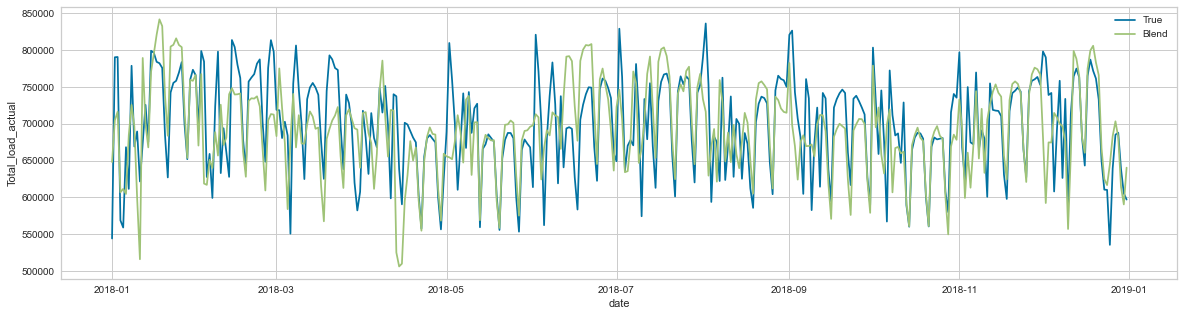

In [186]:
plt.figure(figsize=(20,5))
plot_series(py_test.date, py_test['total_load_actual'],"True")
plot_series(py_test.date, xg_predictions['Label'],'Blend')

In [187]:
xg_predictions

,date,year,month,day,season,day_of_week,total_load_actual,Label
1096,2018-01-01,2018,1,1,1,0,544393.0,648186.3125
1097,2018-01-02,2018,1,2,1,1,790289.0,704669.9375
1098,2018-01-03,2018,1,3,1,2,790635.0,716353.6250
1099,2018-01-04,2018,1,4,1,3,568997.0,607034.8750
1100,2018-01-05,2018,1,5,1,4,559237.0,611666.6875
...,...,...,...,...,...,...,...,...
1456,2018-12-27,2018,12,27,4,3,685241.0,703377.8750
1457,2018-12-28,2018,12,28,4,4,687868.0,681602.8125
1458,2018-12-29,2018,12,29,4,5,638495.0,614268.8750
1459,2018-12-30,2018,12,30,4,6,605724.0,590586.5625


In [188]:
blend_specific = blend_models(estimator_list = [tuned_rf,tuned_lightgbm,tuned_xg])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,54117.5220,4280579578.9800,65426.1383,0.1488,0.0975,0.0819
1,58468.0632,4410431098.6397,66411.0766,-0.1717,0.0983,0.0899
2,38808.8377,2636594117.9782,51347.7762,0.4257,0.0796,0.0600
3,34147.7715,2120308533.6180,46046.8081,0.4187,0.0696,0.0517
4,32493.2647,1883628164.8084,43400.7853,0.4885,0.0644,0.0486
5,29221.5567,1397092104.2263,37377.6953,0.5424,0.0557,0.0434
6,44565.4349,3041631628.0477,55150.9894,0.3932,0.0808,0.0647
7,38998.8535,2793274840.4225,52851.4412,0.3184,0.0805,0.0600
8,34566.1626,2035430382.1505,45115.7443,0.4434,0.0655,0.0497


In [191]:
predict_model(blend_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,36655.1244,2278421857.3389,47732.8174,0.4665,0.0694,0.0532


,year,month,day,season,day_of_week,date_month_1,date_month_10,date_month_11,date_month_12,date_month_2,...,date_weekday_1,date_weekday_2,date_weekday_3,date_weekday_4,date_weekday_5,date_weekday_6,date_is_month_end_1,date_is_month_start_1,total_load_actual,Label
0,2018.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,544393.0,667546.308245
1,2018.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,790289.0,707366.863503
2,2018.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,790635.0,701468.150882
3,2018.0,1.0,4.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,568997.0,647788.074269
4,2018.0,1.0,5.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,559237.0,651238.319545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018.0,12.0,27.0,4.0,3.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,685241.0,697817.305561
361,2018.0,12.0,28.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,687868.0,691013.599069
362,2018.0,12.0,29.0,4.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,638495.0,644074.803447
363,2018.0,12.0,30.0,4.0,6.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,605724.0,615222.308064


In [192]:
final_model = finalize_model(blend_specific)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 

In [193]:
unseen_predictions_2 = predict_model(final_model, data=py_test, round=0)
unseen_predictions_2.loc[unseen_predictions_2['Label'] < 0, 'Label'] = 0
unseen_predictions_2.head(20)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,36655,2278421857,47733,0,0,0


,date,year,month,day,season,day_of_week,total_load_actual,Label
1096,2018-01-01,2018,1,1,1,0,544393.0,667546.308222
1097,2018-01-02,2018,1,2,1,1,790289.0,707366.863489
1098,2018-01-03,2018,1,3,1,2,790635.0,701468.150904
1099,2018-01-04,2018,1,4,1,3,568997.0,647788.074271
1100,2018-01-05,2018,1,5,1,4,559237.0,651238.319540
1101,2018-01-06,2018,1,6,1,5,668203.0,666198.431527
1102,2018-01-07,2018,1,7,1,6,611720.0,679499.971670
1103,2018-01-08,2018,1,8,1,0,778702.0,705799.106087
1104,2018-01-09,2018,1,9,1,1,669157.0,696905.374359
1105,2018-01-10,2018,1,10,1,2,689579.0,669907.631324


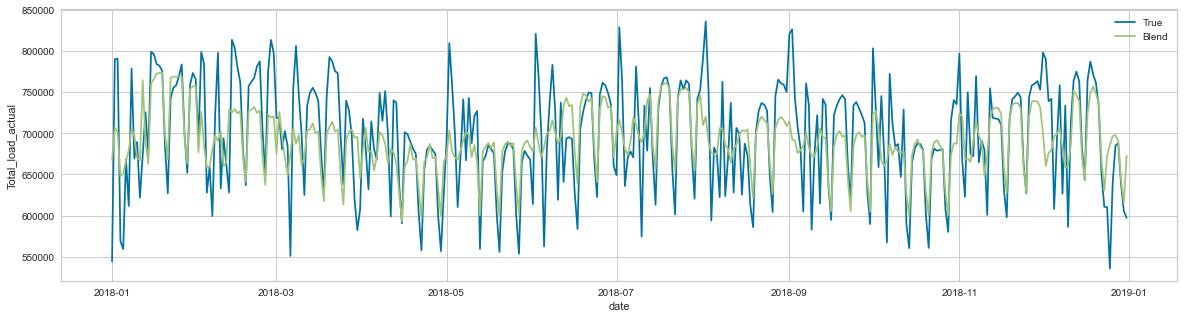

In [195]:
plt.figure(figsize=(20,5))
plot_series(py_test.date, py_test['total_load_actual'],"True")
plot_series(py_test.date, unseen_predictions_2['Label'],'Blend')

# LSTM Model

In [ ]:
categorical_features = ["year","month","day","hour","season"]
le = LabelEncoder()
labels = son_df[categorical_features].apply(le.fit_transform)

ls_df = pd.concat([labels, son_df["total_load_actual"]],axis=1)
ls_df.info()

In [ ]:
ls_train, ls_test = ls_df[ls_df.year < 3], ls_df[ls_df.year == 3]
print(ls_train.shape)
print(ls_test.shape)

In [ ]:

load_transformer = RobustScaler()
load_transformer = load_transformer.fit(ls_train[['total_load_actual']])

ls_train['total_load_actual'] = load_transformer.transform(ls_train[['total_load_actual']])

ls_test['total_load_actual'] = load_transformer.transform(ls_test[['total_load_actual']])

In [ ]:
ls_test

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)


In [ ]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(ls_train, ls_train.total_load_actual, time_steps)
X_test, y_test = create_dataset(ls_test, ls_test.total_load_actual, time_steps)


print(X_train.shape, y_train.shape)

In [ ]:
def lstm_model():
    model = keras.Sequential()
    model.add(
      keras.layers.Bidirectional(
        keras.layers.LSTM(
          units=128, 
          input_shape=(X_train.shape[1], X_train.shape[2])
        )
      )
    )
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
param_grid = {'epochs': [5, 10, 25, 50, 100, 200],
              'batch_size': [10,20,30]
              }

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(model=lstm_model, epochs=10, batch_size=5, verbose=0)

sh = GridSearchCV(estimator, param_grid, cv=10).fit(X_train, y_train)

best_estimator = sh.best_estimator_
print("best param.", sh.best_params_)

model_fitted = best_estimator.fit(X_train, y_train)
pred_train = model_fitted.predict(X_train)
pred = model_fitted.predict(X_test)

mse_tr = mean_squared_error(y_train, pred_train)
mse_tst = mean_squared_error(y_test, pred)

msg = "%s: %f %f" % (name, mse_tr, mse_tst)
print(msg)

In [ ]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 20, 30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
#Create Model
model = KerasRegressor(model=lstm_model,nb_epoch=100, batch_size=5, verbose=0)
#Define Grid Search Structure
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

#Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from keras.callbacks import EarlyStopping, CSVLogger
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=3)
csv_logger = CSVLogger('training.log')
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 20, 30]
model = lstm_model()
for batch_no in batch_size:
    for ep in epochs:
        print('Epoch: ',ep,'and Batch_Size:',batch_no)
        history=model.fit(X_train,y_train,epochs=ep,batch_size=batch_no,validation_data=(X_test,y_test) ,verbose=2,callbacks=[csv_logger])



In [ ]:
!pip install -q -U keras-tuner

In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(lstm_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

In [ ]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

In [ ]:
model2 = lstm_model()
history = model2.fit(
    X_train, y_train, 
    epochs=5, 
    batch_size=10, 
    validation_split=0.1,
    shuffle=False
)

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
y_train_inv = load_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = load_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = load_transformer.inverse_transform(y_pred)

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Total_Load')
plt.xlabel('Time Step')
plt.legend()
plt.show();
plt.rcParams['figure.figsize'] = [30, 10]

In [ ]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Total Load Actual')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [ ]:
print('R2 Score for LSTM Model =',r2_score(y_test, y_pred))

In [ ]:
wdf = pd.read_csv('weather_features.csv')
wdf.info()

In [ ]:
wdf.head()